First, import the frame_algorithms Python file.

In [ ]:
from frames.frame_algorithms import *

Turn Brody's graphing code into a function to test different dimensions, number of frames, and number of iterations.

In [ ]:
from src.frames.frame import RandomFrame


def run(dim, num_frame_vecs, iters):
    frame = RandomFrame(dimension=dim, num_frame_vecs=num_frame_vecs, is_unit=True)
    vector = random_unit_vector(dimension=dim)
    recover, error = standard_frame_algorithm(frame, vector, iters)
    plt.semilogy(np.arange(1, iters + 1), error, "-ob")
    plt.xlabel("Iteration")
    plt.ylabel("||x-y_k||")
    plt.show()

Test with dim=30, num_frame_vecs=50, iters=20.

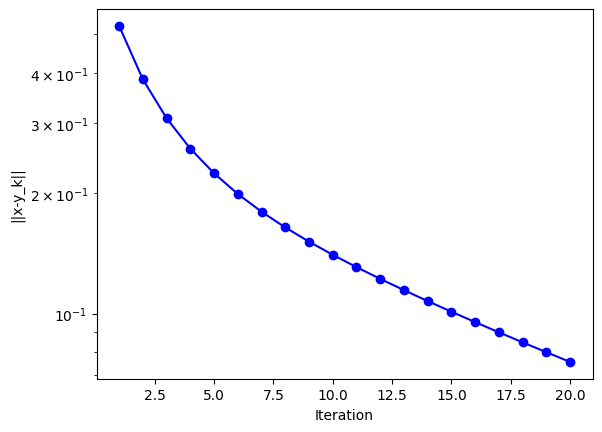

In [5]:
run(30, 50, 20)

Make function to see how the convergence looks in 2D and 3D. Uses Plotly for interactive plots, so have to turn the iterates into a Pandas DataFrame with proper column names. Colors the points by the iteration number.

In [ ]:
import plotly.express as px
import pandas as pd

from src.frames.frame import RandomFrame
def plot_2d_iters(num_frame_vecs, iters):
    dim = 2
    frame = RandomFrame(dimension=dim, num_frame_vecs=num_frame_vecs, is_unit=True)
    vector = random_unit_vector(dimension=dim)
    recover, error = standard_frame_algorithm(frame, vector, iters)
    # print(recover)
    recover = np.column_stack(recover).T
    # print(recover)
    recover = np.column_stack([recover, range(len(recover))])
    # print(recover)
    recover = pd.DataFrame(recover, columns=['x','y','iter'])
    scatter = px.scatter(recover, x='x', y='y', color='iter')
    scatter.show()

def plot_3d_iters(num_frame_vecs, iters):
    dim = 3
    frame = RandomFrame(dimension=dim, num_frame_vecs=num_frame_vecs, is_unit=True)
    vector = random_unit_vector(dimension=dim)
    recover, error = standard_frame_algorithm(frame, vector, iters)
    recover = np.column_stack(recover).T
    # print(recover)
    recover = np.column_stack([recover, range(len(recover))])
    # print(recover)
    recover = pd.DataFrame(recover, columns=['x','y','z','iter'])
    scatter = px.scatter_3d(recover, x='x', y='y', z='z', color='iter')
    scatter.show()
   

In [27]:
plot_2d_iters(10, 20)

In [28]:
plot_3d_iters(10, 20)